In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.plotting  # For Pandas Scatter Matrix
import random

In [3]:
file = pd.read_csv('data.csv')
file.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
file.shape

(569, 33)

In [5]:
# The Dataset set has 569 rows and 33 columns
# Diagnosis is our target column
# The last column -> Unnamed 32 has no data in it, hence can be dropped

In [6]:
file.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
file = file.iloc[:,:-1]
# Dropping the last column

In [8]:
file.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data =  file.iloc[:,:12]

In [10]:
data.shape

(569, 12)

In [11]:
# Correlation 
print(data.corr())

                              id  radius_mean  texture_mean  perimeter_mean  \
id                      1.000000     0.074626      0.099770        0.073159   
radius_mean             0.074626     1.000000      0.323782        0.997855   
texture_mean            0.099770     0.323782      1.000000        0.329533   
perimeter_mean          0.073159     0.997855      0.329533        1.000000   
area_mean               0.096893     0.987357      0.321086        0.986507   
smoothness_mean        -0.012968     0.170581     -0.023389        0.207278   
compactness_mean        0.000096     0.506124      0.236702        0.556936   
concavity_mean          0.050080     0.676764      0.302418        0.716136   
concave points_mean     0.044158     0.822529      0.293464        0.850977   
symmetry_mean          -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean -0.052511    -0.311631     -0.076437       -0.261477   

                        area_mean  smoothness_mean 

[]

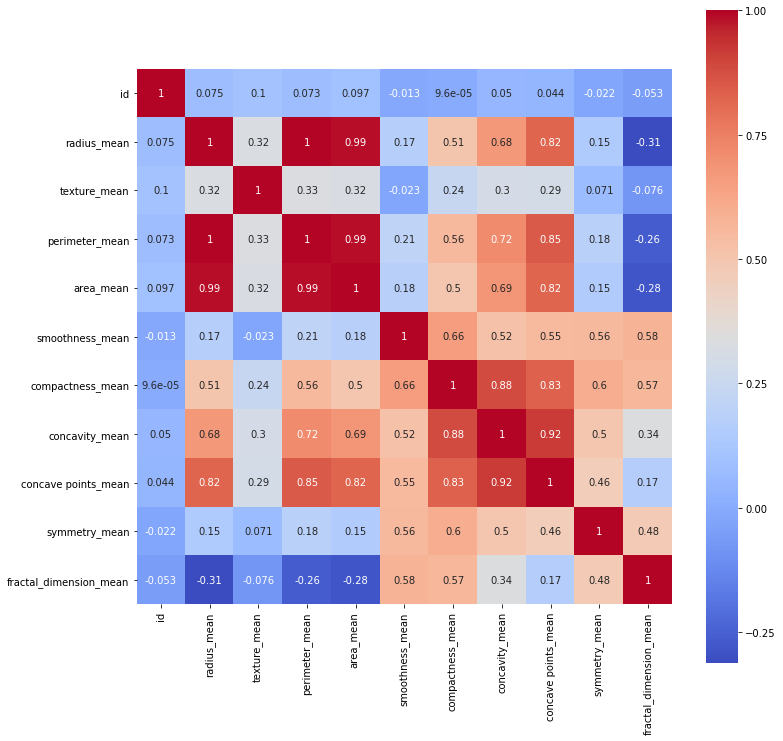

In [12]:
#HeatMap to calculate correlation
#annot-> Annotations
#square -> Point shapes 
#cmap -> Color Map, coolwarm colors in blue and white
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,square=True,cmap='coolwarm')
plt.plot()
# id has very little co-rrelation with other data fields
# fractal_dimension_meanaalso has very little correlation with other data points

In [15]:
# HeatMap doesnot indicate trends 
cdict = {'M':'red','B':'blue'}
colors = data['diagnosis'].map(lambda x : cdict[x])

In [16]:
print(colors.head())

0    red
1    red
2    red
3    red
4    red
Name: diagnosis, dtype: object


[]

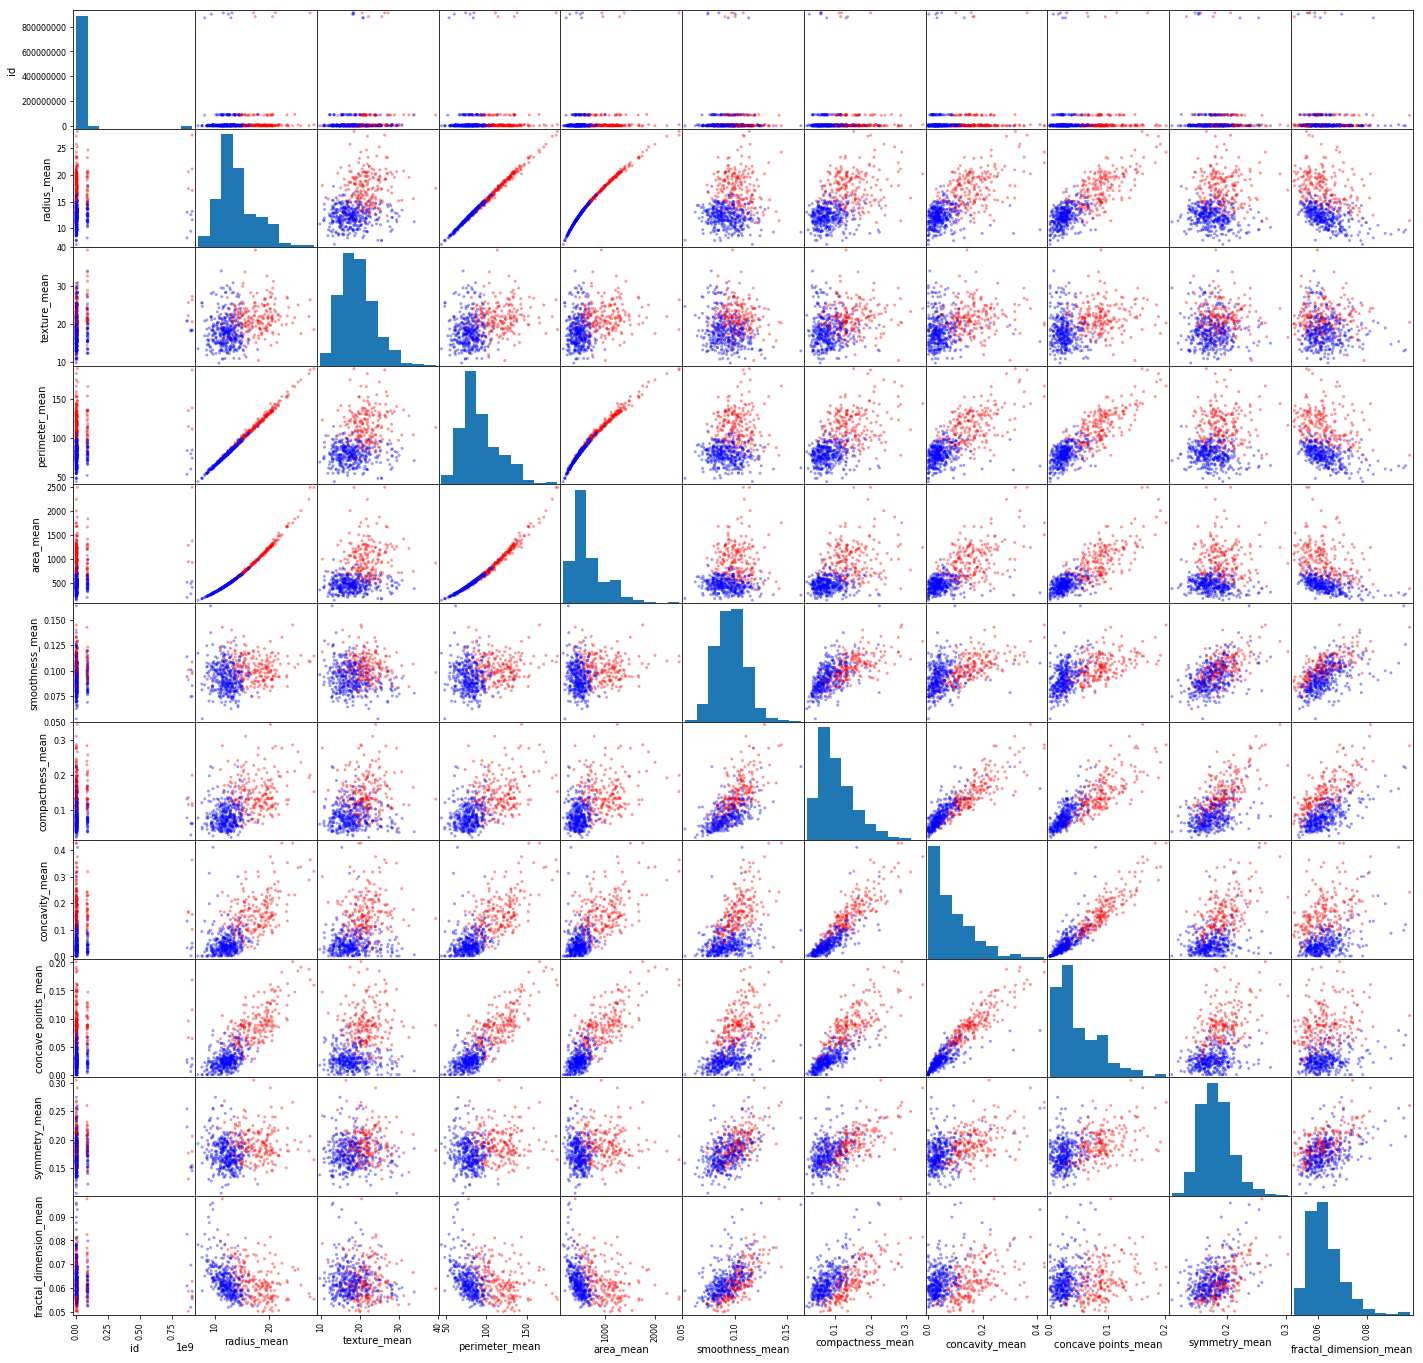

In [17]:
# Scatter Matrix
# transparency -> alpha
pd.plotting.scatter_matrix(data,c=colors,alpha=0.4,figsize=((24,24)))
plt.plot()
# Values parallel to x or y axis -> mostly useless points. 
# Note -> Graphs have different units 
# Bring them down to a standard scale

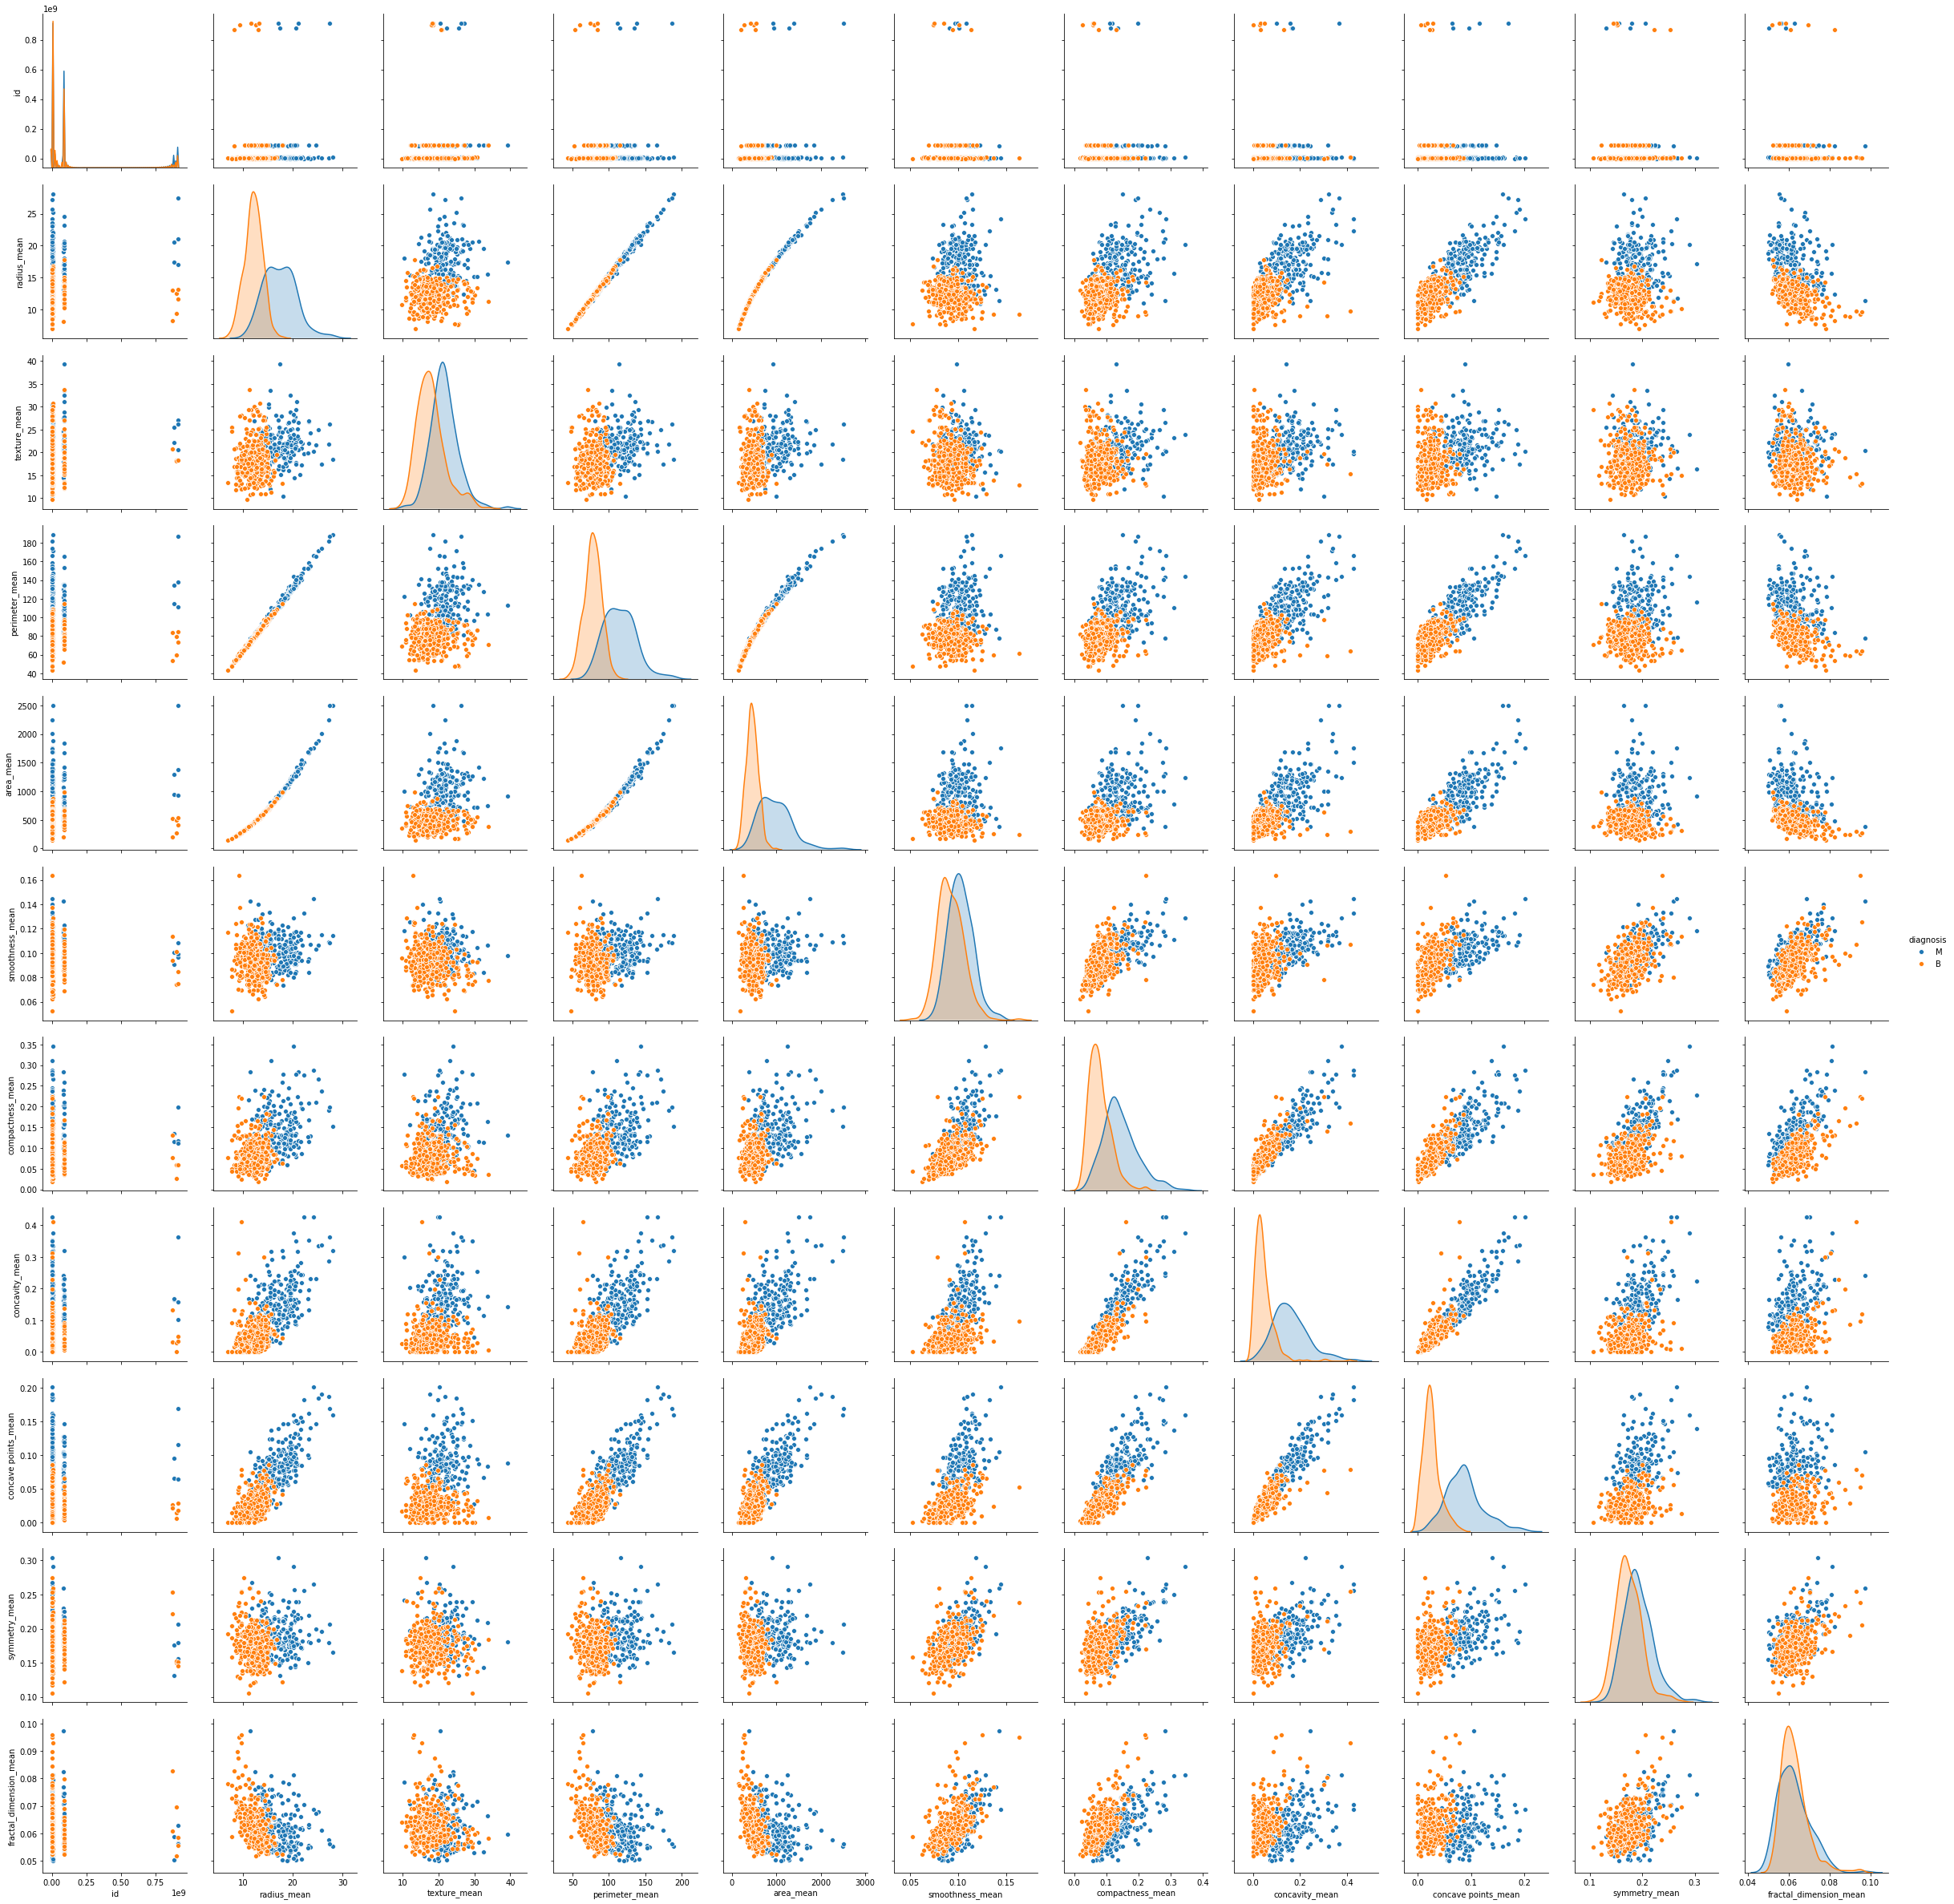

In [18]:
# Alternatively use Seaborn to generate Scatter Plots
sns.pairplot(data, hue="diagnosis", height=3);

In [25]:
#y = file.pop('diagnosis')
data = file
data.set_index('id')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
column_names = data.columns.values.tolist()
column_names = column_names[2:12]
print(column_names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [30]:
bins = 12 
%pylab
# 15 X 15 is the size of the whole plot, not individual graphs inside it
plt.figure(figsize==(15,15))
rows = int((len(column_names))+1)/2 ;
for index, val in enumerate(column_names):
    plt.subplot(rows,2,index+1)
    sns.distplot(data[data.diagnosis=="M"][val],bins=12,color='red',label="Malignat")
    sns.distplot(data[data.diagnosis=="B"][val],bins=12,color='blue',label="Benign")
    plt.legend(loc='upper right')
    plt.tight_layout() #Removes WhiteSpace
    plt.show()


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [31]:
# We see that the histogram plot shows radius_mean, area_mean, perimeter_mean have a lesser degree of overlap and hence can be useful feature in our target classification.

In [34]:
# Box Plots for uni-variate Analysis 
plt.figure(figsize=(15,15))
for index, val in enumerate(column_names):
    plt.subplot(rows,2,index+1)
    sns.boxplot(x="diagnosis",y=val,data=data,hue='diagnosis')
    plt.tight_layout()
    plt.show()

In [35]:
data1 = pd.read_csv('Data.csv')
data1.pop('Unnamed: 32')
data1.set_index('id')
data1= data1.iloc[:,2:12]
stats = data1.describe()

In [36]:
stats = stats.T

In [37]:
avg = stats['mean']
std = stats['std']
df_scaled = (data1-avg)/std
scaled_features = df_scaled.columns

In [38]:
# Z Score or Standard Scaling : (x - mean)/ Std_deviation
# Z < 1 -> Normal Point
# Z > 3 -> Outliers 
# If we plot a circle with mean as centre and std deviation as radius, then all points with z-score = 1 will lie on the circle.
# Inside circle -> Z score < 1
# Outside circle Z-score > 1 

print(scaled_features)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')


In [40]:
y = file.pop('diagnosis')
df_scaled['diagnosis'] = y
file['diagnosis'] = y
for index, val in enumerate(scaled_features):
    plt.subplot(rows,2,index+1)
    sns.boxplot(x="diagnosis",y=val,data=df_scaled,hue='diagnosis')
    plt.show()